# Classification of Concrete Images Using Decision Tree: Full Notebook

## Load and Preprocess Data: SDNET2018 Dataset

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
import scipy as sp
%matplotlib inline

from skimage.transform import rescale

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve, precision_recall_curve, plot_precision_recall_curve, roc_curve

from joblib import dump

In [3]:
#https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/

DATADIR = "Downloads/DATA_Maguire_20180517_ALL/SDNET2018"
CATEGORIES = ["CD","CP","CW","UD","UP","UW"]

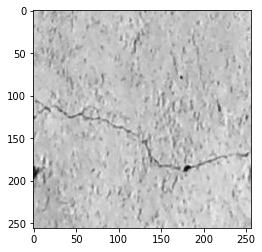

[[183 183 181 ... 183 190 195]
 [182 183 183 ... 183 191 196]
 [182 184 185 ... 184 192 196]
 ...
 [179 179 177 ... 175 176 177]
 [180 180 178 ... 184 182 179]
 [182 181 179 ... 193 187 182]]
(256, 256)


In [4]:
#https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  # create path
    for img in os.listdir(path):  # iterate over each image
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display

        break  # just want one, so break
    break
print(img_array)
print(img_array.shape)

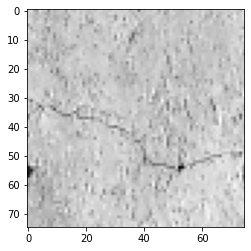

In [5]:
#rescale images
#https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/
IMG_SIZE = 75 #new image size is 75 x 75

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

IMG_SIZE of 75 retains enough data to still visualize a crack in concrete. I did try larger sizes, such as IMG_SIZE = 90, but there was no major difference in results. Smaller sizes, such as IMG_SIZE = 50, did result in less favorable results.

In [6]:
#create list of image arrays and list of labels
img_arrays = []
labels = []
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  # create path
    for img in os.listdir(path):  # iterate over each image
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        img_arrays.append(new_array)
        if category == 'CD':
            labels.append(1)
        elif category == 'UD':
            labels.append(0)
        elif category == 'CP':
            labels.append(1)
        elif category == 'UP':
            labels.append(0)
        elif category == 'CW':
            labels.append(1)
        elif category == 'UW':
            labels.append(0)

## Split into Training and Test Data

### 75% train, 25% test

In [7]:
X = img_arrays
y = labels

#75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

42069
42069
14023
14023


In [8]:
#convert lists to arrays
X_train_array = np.array(X_train)
print(X_train_array.shape)
X_test_array = np.array(X_test)
print(X_test_array.shape)

(42069, 75, 75)
(14023, 75, 75)


In [9]:
#flatten 3D arrays into 2D arrays
X_train_flat = X_train_array.reshape(42069, 5625)
print(X_train_flat.shape)
X_test_flat = X_test_array.reshape(14023, 5625)
print(X_test_flat.shape)

(42069, 5625)
(14023, 5625)


### 50% train, 50% test

In [10]:
X = img_arrays
y = labels

#50% train, 50% test
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, y, test_size=0.5, random_state=42)

#convert lists to arrays
X_train_array_50 = np.array(X_train_50)
print(X_train_array_50.shape)
X_test_array_50 = np.array(X_test_50)
print(X_test_array_50.shape)

(28046, 75, 75)
(28046, 75, 75)


In [11]:
#flatten 3D arrays into 2D arrays
X_train_flat_50 = X_train_array_50.reshape(28046, 5625)
X_test_flat_50 = X_test_array_50.reshape(28046, 5625)

### 25% train, 75% test

In [23]:
X = img_arrays
y = labels

#25% train, 75% test
X_train_25, X_test_25, y_train_25, y_test_25 = train_test_split(X, y, test_size=0.75, random_state=42)

#convert lists to arrays
X_train_array_25 = np.array(X_train_25)
print(X_train_array_25.shape)
X_test_array_25 = np.array(X_test_25)
print(X_test_array_25.shape)

(14023, 75, 75)
(42069, 75, 75)


In [24]:
#flatten 3D arrays into 2D arrays
X_train_flat_25 = X_train_array_25.reshape(14023, 5625)
X_test_flat_25 = X_test_array_25.reshape(42069, 5625)

## Dimensionality Reduction

### PCA

### 75% train, 25% test

In [14]:
# #run to visualize explained variance ratio vs. all eigen/singular values
# pca = PCA()

# pca.fit(X_train_flat)
    
# plt.plot(range(0, len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))

Appears 90-95% of the variance is captured in 3,000 components.

In [15]:
#retain 3,000 components
pca = PCA(n_components=3000)

pca.fit(X_train_flat)

#plot
#plt.plot(range(0, len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))

PCA(n_components=3000)

In [16]:
X_train_pca = pca.transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

### 50% train, 50% test

In [17]:
# #run to visualize explained variance ratio vs. all eigen/singular values
# pca = PCA()

# pca.fit(X_train_flat_50)
    
# plt.plot(range(0, len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))

Appears 90-95% of the variance is captured in 3,000 components.

In [18]:
#retain 3,000 components
pca = PCA(n_components=3000)
pca.fit(X_train_flat_50)

X_train_pca_50 = pca.transform(X_train_flat_50)
X_test_pca_50 = pca.transform(X_test_flat_50)

### 25% train, 75% test

In [19]:
# #run to visualize explained variance ratio vs. all eigen/singular values
# pca = PCA()

# pca.fit(X_train_flat_25)
    
# plt.plot(range(0, len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))

Appears 90-95% of the variance is captured in 3,000 components.

In [25]:
#retain 3,000 components
pca = PCA(n_components=3000)
pca.fit(X_train_flat_25)

X_train_pca_25 = pca.transform(X_train_flat_25)
X_test_pca_25 = pca.transform(X_test_flat_25)

## Decision Tree Classification

This decision tree was ultimately constructed using DecisionTreeClassifier with no change in default parameters. Implementation was also attempted with DecisionTreeRegressor and RandomForestClassifier. Additionally, several parameters were experimented with in an attempt to improve performance.


Some notes about parameters:

criterion: gini is the default and entropy does not give much different results

splitter: between 'best' and 'random,' best gives better results

max_depth: several max depths were trialed; a smaller max depth resulted in an increase in overall accuracy and an increase in uncracked image classification results, but, decreased cracked image classification results

min_samples_split: does not seem to make much of a difference

min_samples_leaf: does not seem to make much of a difference

min_impurity_decrease: any min_impurity_decrease value >0.0001 improves overall accuracy, but no 'cracked' images are predicted

ccp_alpha: any min_impurity_decrease value >0.0001 improves overall accuracy, but no 'cracked' images are predicted

### 75% train, 25% test

### DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_pca,y_train)
y_pred = dtree.predict(X_test_pca)

#### Evaluate Results

In [27]:
#classification report
target_names = ['class 0: uncracked','class 1: cracked']
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

class 0: uncracked       0.86      0.82      0.84     11858
  class 1: cracked       0.20      0.26      0.23      2165

          accuracy                           0.73     14023
         macro avg       0.53      0.54      0.53     14023
      weighted avg       0.76      0.73      0.74     14023



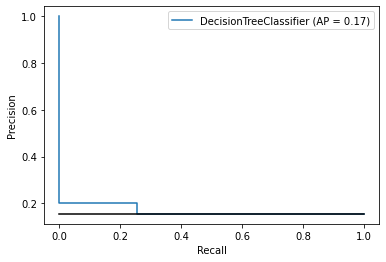

In [28]:
#PR Curve
zeroList = []
oneList = []

for i in y_test:
    if i == 0:
        zeroList.append(i)
    elif i == 1:
        oneList.append(i)
    
y_ax = len(oneList)/(len(zeroList)+len(oneList))

plot_precision_recall_curve(dtree,X_test_pca,y_test)
plt.plot([0,1],[y_ax,y_ax],c='k')
plt.legend(loc='best')

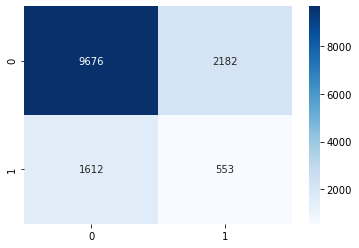

In [29]:
#confusion matrix
cf = confusion_matrix(y_test,y_pred)

#https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=64484232
sns.heatmap(cf,annot=True,cmap='Blues',fmt='g')
plt.show()

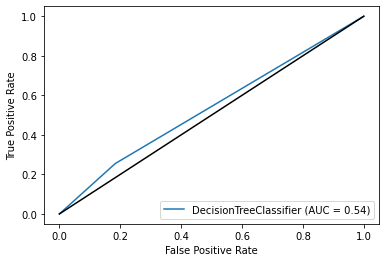

In [30]:
#ROC curve
#https://www.youtube.com/watch?v=YrceRETSuUI
plot_roc_curve(dtree,X_test_pca,y_test)
plt.plot([0,1],[0,1], c='k')

The dataset used is very unbalanced between 'cracked' images and 'uncracked' images. As a result, overall performance results for the 'uncracked' class is relatively high, while inversely, results for the 'cracked' class are very poor. It seems that models that increase 'uncracked' F1 score decrease 'cracked' F1 score and vice versa. The DecisionTreeClassifier model above gives the highest 'cracked' F1 score I was able to achieve, and is therefore used throughout the rest of this notebook for testing on different percentages of training data. 

### Random Forest w/Entropy

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion="entropy",random_state = 42)
rfc.fit(X_train_pca,y_train)
rfc_pred_test=rfc.predict(X_test_pca)

#### Evaluate Results

In [32]:
#classification report
target_names = ['class 0: uncracked','class 1: cracked']
print(classification_report(y_test, rfc_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

class 0: uncracked       0.85      1.00      0.92     11858
  class 1: cracked       0.67      0.00      0.00      2165

          accuracy                           0.85     14023
         macro avg       0.76      0.50      0.46     14023
      weighted avg       0.82      0.85      0.78     14023



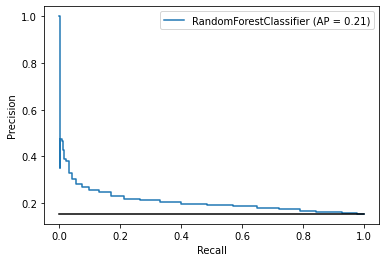

In [33]:
#PR Curve
zeroList = []
oneList = []

for i in y_test:
    if i == 0:
        zeroList.append(i)
    elif i == 1:
        oneList.append(i)
    
y_ax = len(oneList)/(len(zeroList)+len(oneList))

plot_precision_recall_curve(rfc,X_test_pca,y_test)
plt.plot([0,1],[y_ax,y_ax],c='k')
plt.legend(loc='best')

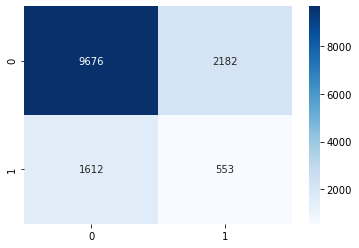

In [34]:
#confusion matrix
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,cmap='Blues',fmt='g')
plt.show()

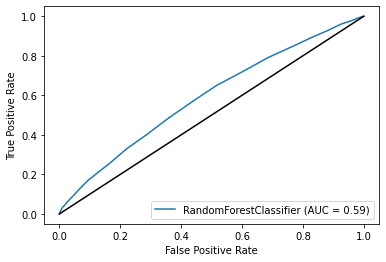

In [35]:
#ROC curve
plot_roc_curve(rfc,X_test_pca,y_test)
plt.plot([0,1],[0,1], c='k')

The RandomForestClassifier model above results in the highest 'uncracked' F1 score I have seen. However, the 'cracked' recall and F1 score are zero, which is why the DecisionTreeClassifier model was ultimately chosen.

### 50% train, 50% test

In [36]:
dtree_50 = DecisionTreeClassifier(random_state=42)
dtree_50.fit(X_train_pca_50,y_train_50)
y_pred_50 = dtree.predict(X_test_pca_50)

#### Evaluate Results

In [37]:
#classification report
target_names = ['class 0: uncracked','class 1: cracked']
print(classification_report(y_test_50, y_pred_50, target_names=target_names))

                    precision    recall  f1-score   support

class 0: uncracked       0.86      0.82      0.84     23734
  class 1: cracked       0.19      0.24      0.21      4312

          accuracy                           0.73     28046
         macro avg       0.52      0.53      0.53     28046
      weighted avg       0.75      0.73      0.74     28046



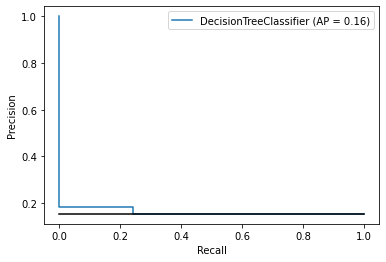

In [38]:
#PR curve
zeroList = []
oneList = []

for i in y_test:
    if i == 0:
        zeroList.append(i)
    elif i == 1:
        oneList.append(i)
    
y_ax = len(oneList)/(len(zeroList)+len(oneList))

plot_precision_recall_curve(dtree_50,X_test_pca_50,y_test_50)
plt.plot([0,1],[y_ax,y_ax],c='k')
plt.legend(loc='best')

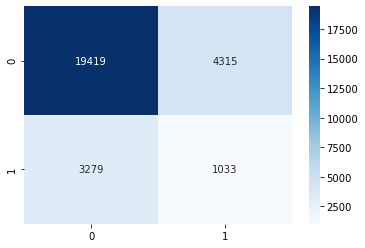

In [39]:
#confusion matrix
cf = confusion_matrix(y_test_50,y_pred_50)
sns.heatmap(cf,annot=True,cmap='Blues',fmt='g')
plt.show()

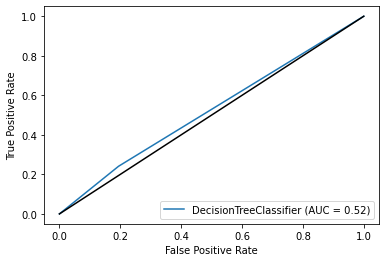

In [40]:
#ROC curve
plot_roc_curve(dtree_50,X_test_pca_50,y_test_50)
plt.plot([0,1],[0,1], c='k')

### 25% train, 75% test

In [41]:
dtree_25 = DecisionTreeClassifier(random_state=42)
dtree_25.fit(X_train_pca_25,y_train_25)
y_pred_25 = dtree.predict(X_test_pca_25)

#### Evaluate Results

In [42]:
#classification report
target_names = ['class 0: uncracked','class 1: cracked']
print(classification_report(y_test_25, y_pred_25, target_names=target_names))

                    precision    recall  f1-score   support

class 0: uncracked       0.86      0.82      0.84     35717
  class 1: cracked       0.19      0.24      0.22      6352

          accuracy                           0.73     42069
         macro avg       0.53      0.53      0.53     42069
      weighted avg       0.76      0.73      0.74     42069



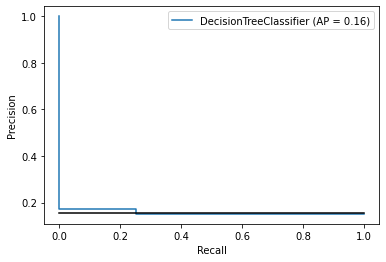

In [43]:
#PR curve
zeroList = []
oneList = []

for i in y_test:
    if i == 0:
        zeroList.append(i)
    elif i == 1:
        oneList.append(i)
    
y_ax = len(oneList)/(len(zeroList)+len(oneList))

plot_precision_recall_curve(dtree_25,X_test_pca_25,y_test_25)
plt.plot([0,1],[y_ax,y_ax],c='k')
plt.legend(loc='best')

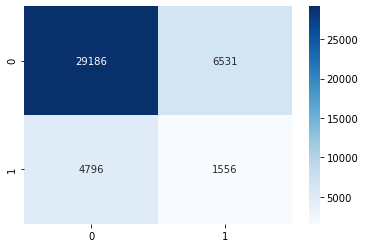

In [44]:
#confusion matrix
cf = confusion_matrix(y_test_25,y_pred_25)
sns.heatmap(cf,annot=True,cmap='Blues',fmt='g')
plt.show()

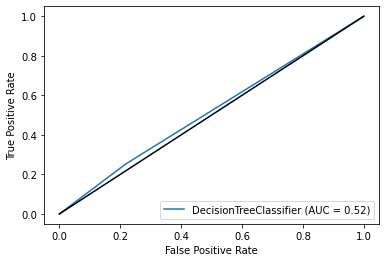

In [45]:
#ROC curve
plot_roc_curve(dtree_25,X_test_pca_25,y_test_25)
plt.plot([0,1],[0,1], c='k')

## Plot Decision Tree

### 75% train, 25% test

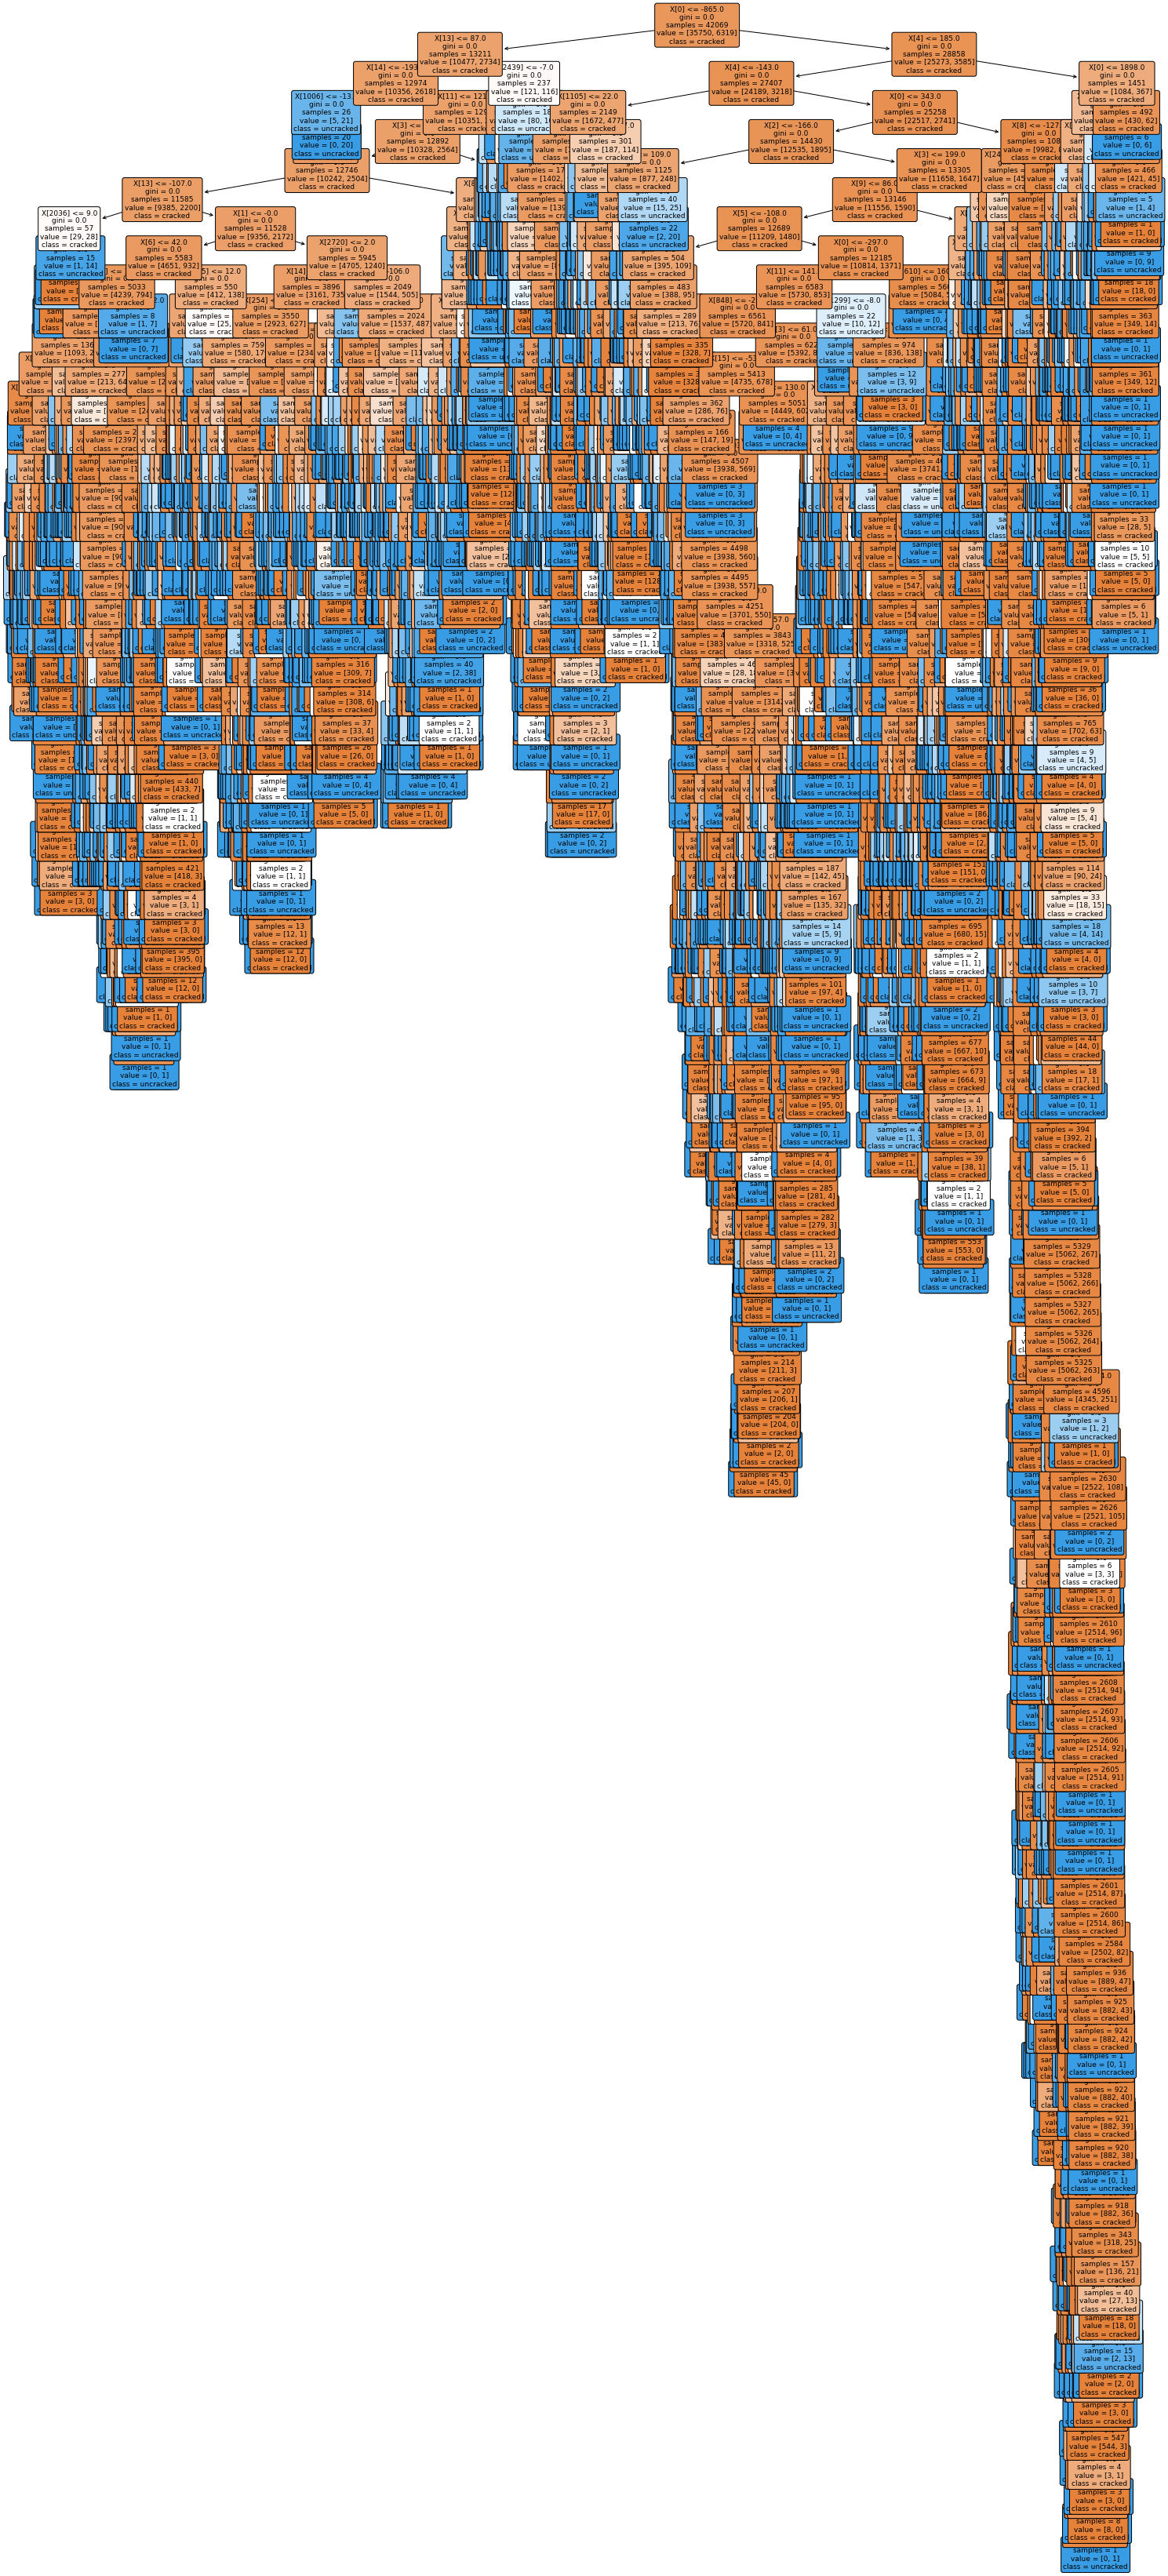

In [46]:
fig = plt.figure(figsize=(25,60))
dec_tree = plot_tree(decision_tree=dtree, class_names =["cracked", "uncracked"] , filled = True , precision = 0, rounded = True, fontsize = 9)

### 50% train, 50% test

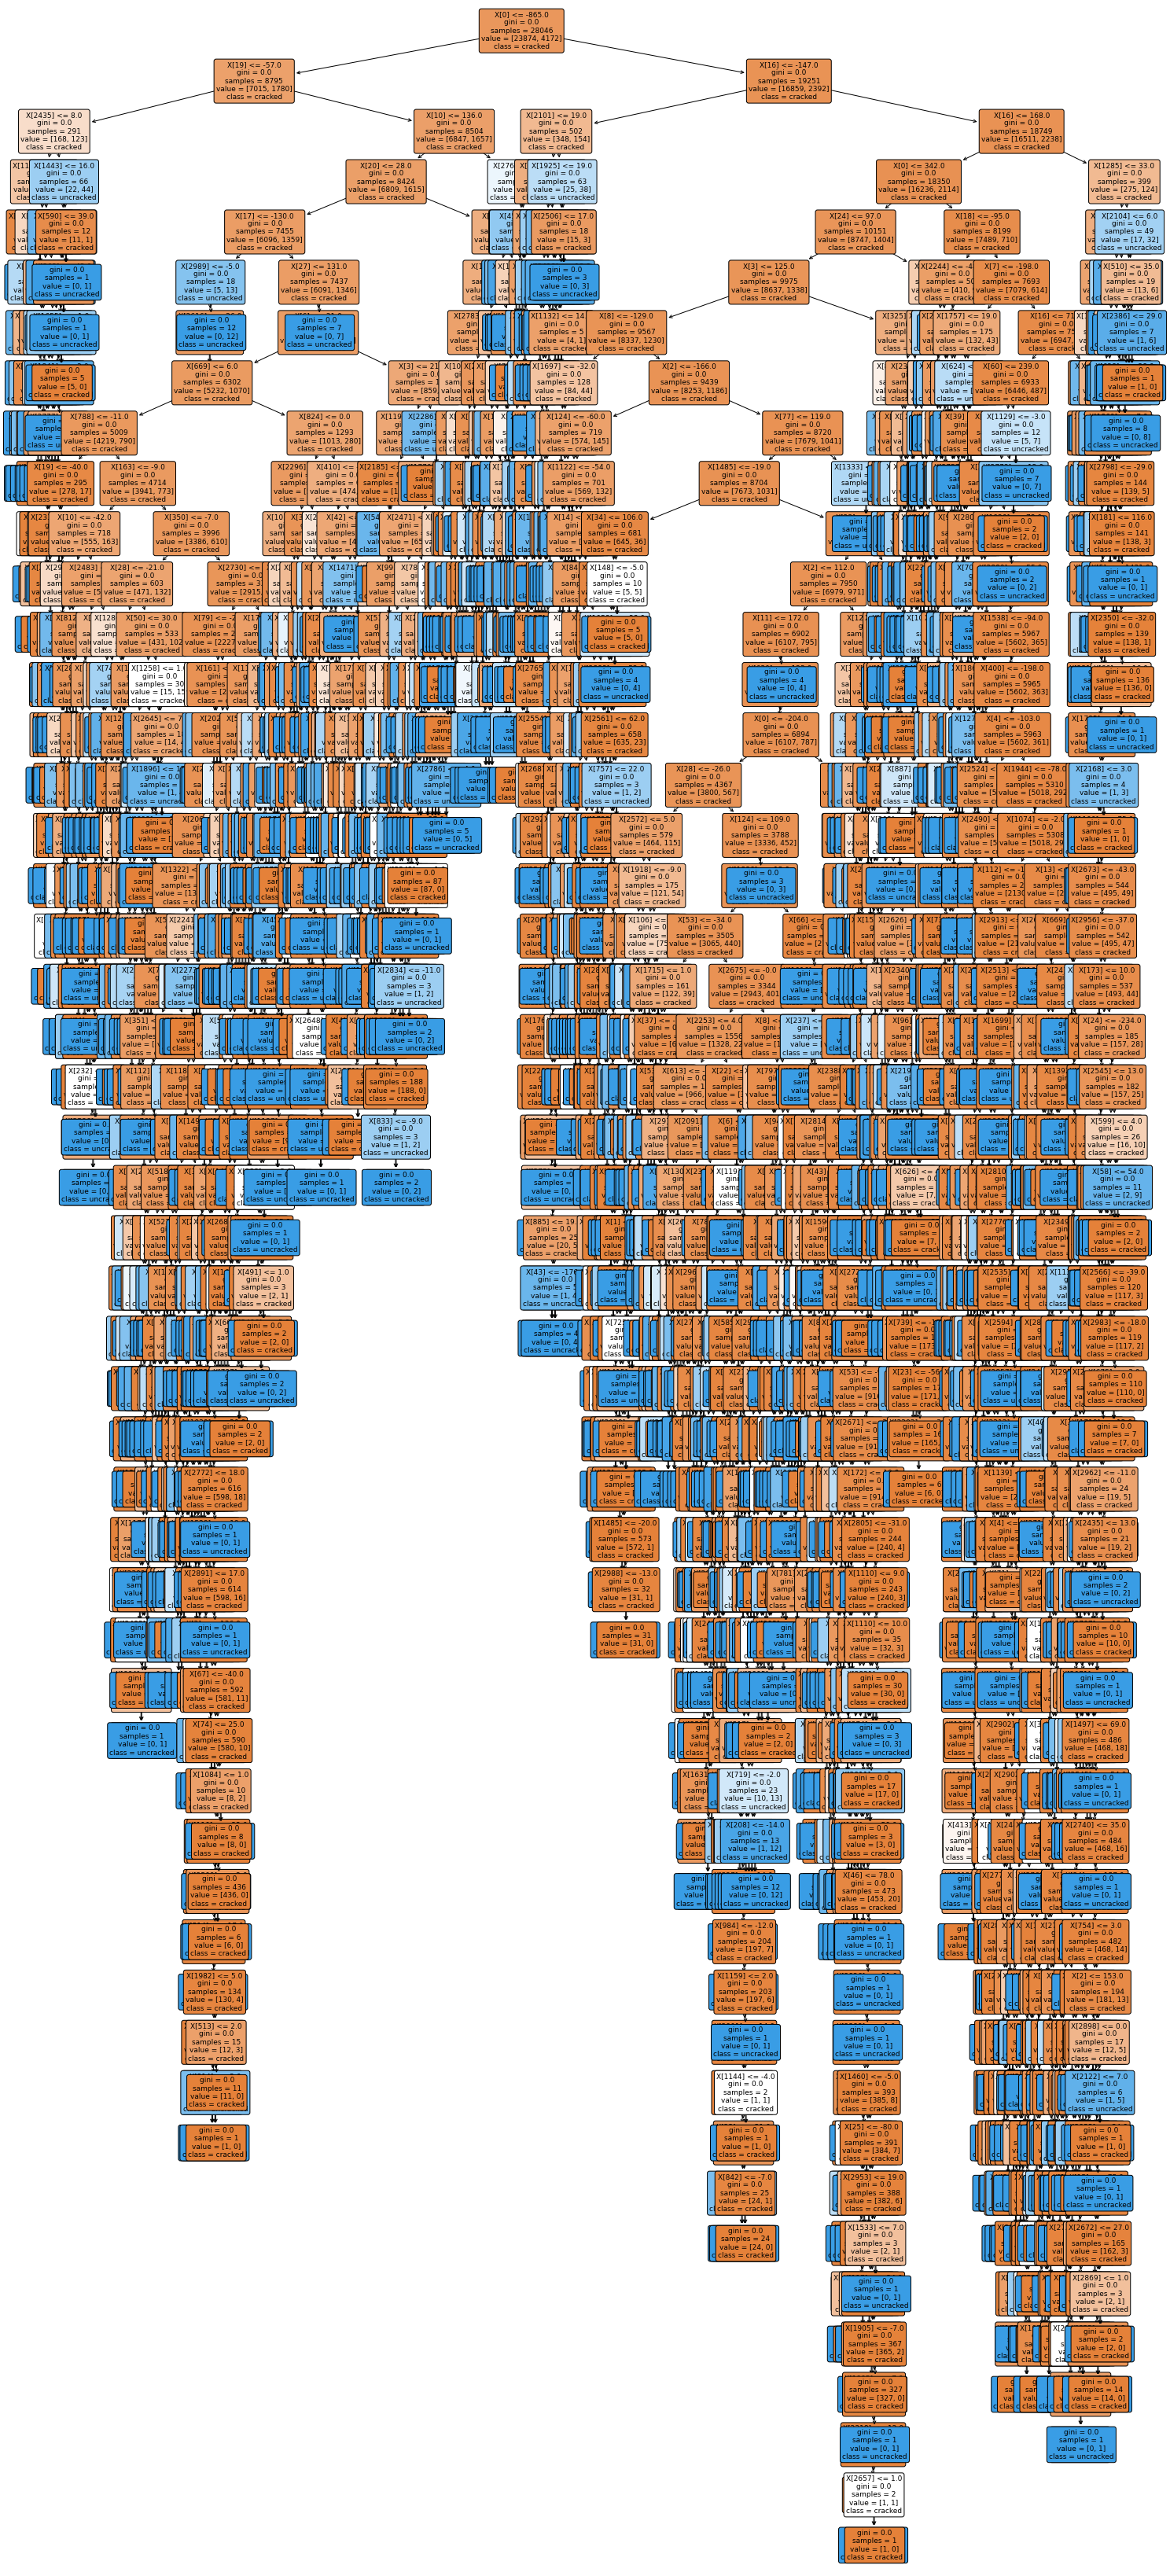

In [47]:
fig = plt.figure(figsize=(25,60))
dec_tree = plot_tree(decision_tree=dtree_50, class_names =["cracked", "uncracked"] , filled = True , precision = 0, rounded = True, fontsize = 9)

### 25% train, 75% test

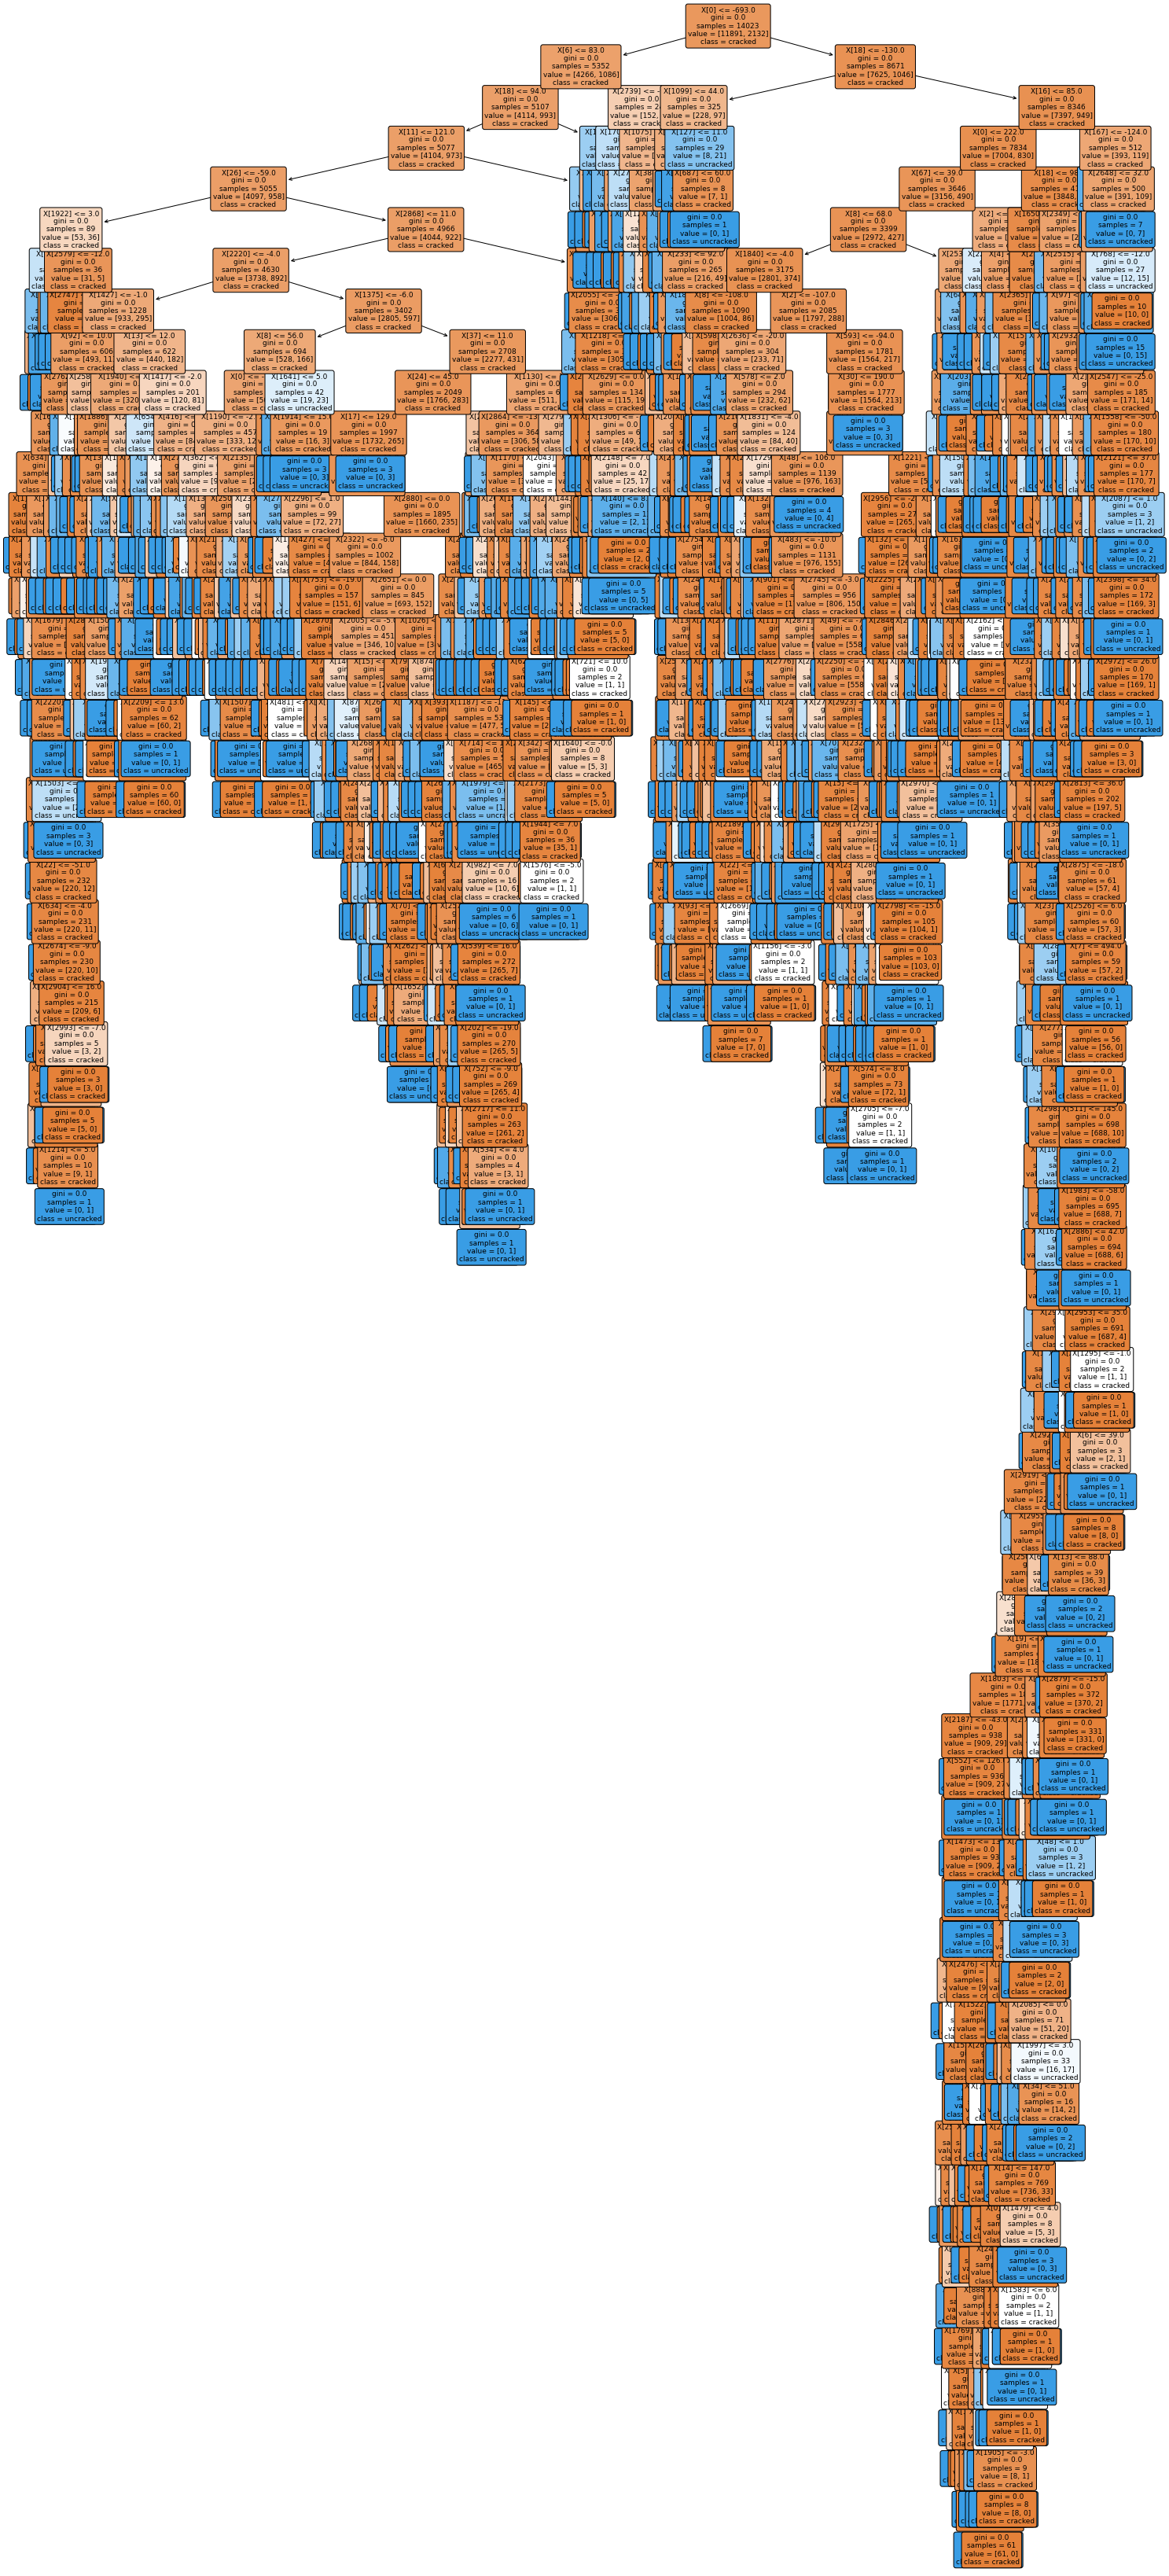

In [48]:
fig = plt.figure(figsize=(25,60))
dec_tree = plot_tree(decision_tree=dtree_25, class_names =["cracked", "uncracked"] , filled = True , precision = 0, rounded = True, fontsize = 9)

## Pruning

### Prepruning

Attempted prepruning by experimenting with various values of max_depth, max_samples_split, and max_samples_leaf. Max_depth had a notable affect on the accuracy of the 'uncracked' class, which in turn had a large affect on the overall accuracy. However, the better the 'uncracked' accuracy became, the worse the 'cracked' accuracy became since this is such an unbalanced dataset. Max_samples_split and max_samples_leaf did not appear to change the results much, if at all.

### Postpruning

Attempted postpruning by experimenting with values of ccp_alpha. Including any ccp_alpha > 0.0001 resulted in some of the highest overall accuracy values I saw while attempting to tune this model. However, including a ccp_alpha value resulted in 0 predicted images for the 'cracked' class.